<a href="https://colab.research.google.com/github/samarthGit2023/Image-Encryption/blob/main/sharvilencrypt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycryptodome


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 25.1 MB/s eta 0:00:00


In [7]:
!pip install pycryptodome


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 30.7 MB/s eta 0:00:00


Here we use it without any rot 13 so the image would be mostly of similar color rathet than much variable

In [27]:
from PIL import Image
import numpy as np

# Open the image file
image_path = "Cat03.jpg"  # Replace with the actual path to your image
image = Image.open(image_path)

# Convert the image to grayscale
image_gray = image.convert("L")

# Split the grayscale image into individual bit planes
bit_planes = []
for bit in range(8):
    bit_plane = np.array(image_gray) & (1 << bit)
    bit_planes.append(bit_plane)

# Define the substitution cipher mapping for each bit plane
cipher_mapping = {
    0: 255,
    1: 200,
    2: 150,
    3: 100,
    4: 50,
    # Define additional mappings as needed for each bit plane
}

# Apply the substitution cipher to each bit plane
ciphertext_planes = []
for bit_plane in bit_planes:
    get_mapping = np.vectorize(lambda x: cipher_mapping.get(x, 0))
    ciphertext_plane = get_mapping(bit_plane)
    ciphertext_planes.append(ciphertext_plane)

# Combine the ciphertext bit planes
ciphertext_image = sum(ciphertext_planes) % 256
ciphertext_image = Image.fromarray(ciphertext_image.astype(np.uint8))

# Define the false color mapping
color_map = [
    (0, 0, 0),           # Black
    (255, 0, 0),         # Red
    (0, 255, 0),         # Green
    (0, 0, 255),         # Blue
    (255, 255, 0),       # Yellow
    (255, 0, 255),       # Magenta
    (0, 255, 255),       # Cyan
    (255, 255, 255),     # White
]

# Apply the false color mapping to the ciphertext image
false_color_image = ciphertext_image.convert("P", palette=Image.ADAPTIVE, colors=len(color_map))
false_color_image.putpalette(sum(color_map, ()))

# Save the false color image
output_image_path = "path_to_save_output_image.png"  # Replace with the desired path and filename
false_color_image.save(output_image_path)

print("False color image saved successfully.")


False color image saved successfully.


Here we implement rot 13 so as you can see there are much visible characteristics and there is a larger color variation in the output image

In [30]:
from PIL import Image
import numpy as np

# Open the image file
image_path = "Cat03.jpg"  # Replace with the actual path to your image
image = Image.open(image_path)

# Convert the image to grayscale
image_gray = image.convert("L")

# Split the grayscale image into individual bit planes
bit_planes = []
for bit in range(8):
    bit_plane = np.array(image_gray) & (1 << bit)
    bit_planes.append(bit_plane.astype(np.uint8))

# Define the substitution cipher mapping using ROT13
def rot13(c):
    if 'a' <= c <= 'z':
        return chr((ord(c) - ord('a') + 13) % 26 + ord('a'))
    elif 'A' <= c <= 'Z':
        return chr((ord(c) - ord('A') + 13) % 26 + ord('A'))
    else:
        return c

# Apply the substitution cipher to each bit plane
ciphertext_planes = []
for bit_plane in bit_planes:
    apply_rot13 = np.vectorize(rot13)
    ciphertext_plane = apply_rot13(bit_plane.astype('U1'))
    ciphertext_planes.append(ciphertext_plane.astype(np.uint8))

# Combine the ciphertext bit planes
ciphertext_image = np.zeros_like(bit_planes[0], dtype=np.uint8)
for plane in ciphertext_planes:
    ciphertext_image |= plane

# Convert the ciphertext image back to grayscale
ciphertext_gray = Image.fromarray(ciphertext_image)

# Define the false color mapping
color_map = [
    (0, 0, 0),           # Black
    (255, 0, 0),         # Red
    (0, 255, 0),         # Green
    (0, 0, 255),         # Blue
    (255, 255, 0),       # Yellow
    (255, 0, 255),       # Magenta
    (0, 255, 255),       # Cyan
    (255, 255, 255),     # White
]

# Apply the false color mapping to the ciphertext image
false_color_image = ciphertext_gray.convert("P", palette=Image.ADAPTIVE, colors=len(color_map))
false_color_image.putpalette(sum(color_map, ()))

# Save the false color image
output_image_path = "path_to_save_output_image.png"  # Replace with the desired path and filename
false_color_image.save(output_image_path)

print("False color image saved successfully.")


False color image saved successfully.




*   original image
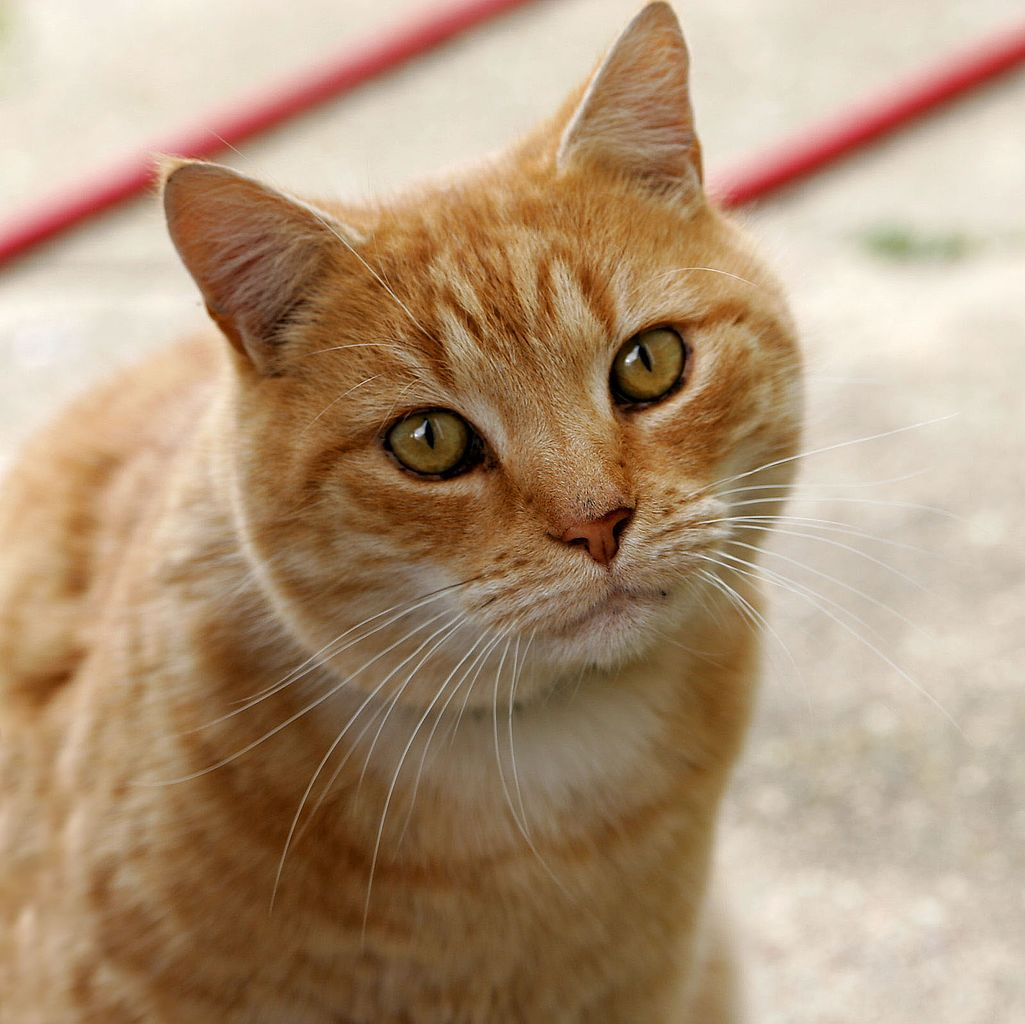
*   1st output
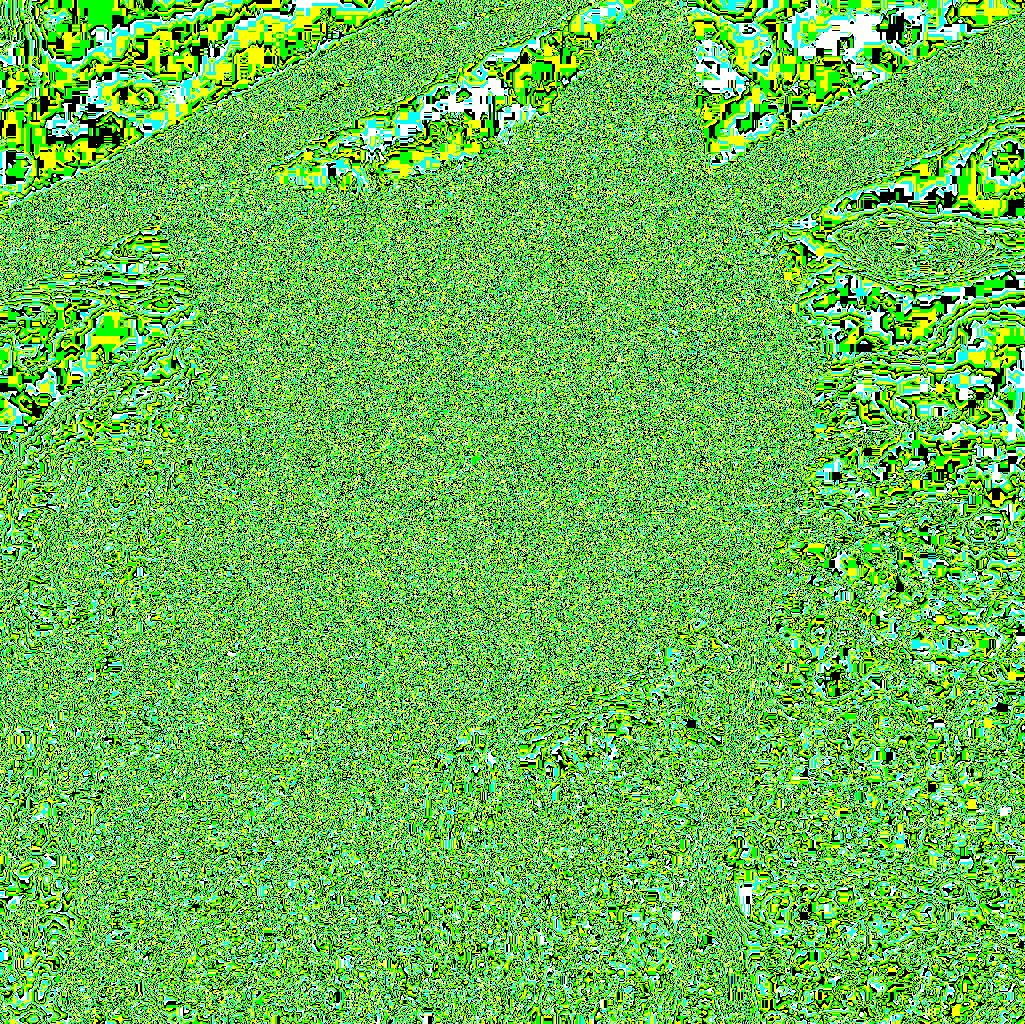…8LM8ZM1A0OGYD0uNpWnhr7AFB61QIsOkI4X3ZTycEXMsoBOi/gaAx5SzqOSw4FE3pulU+1fJfBJS/EaD1CAL2Mmw9b4S3Rxzmh4CPDdL3IxXxFwFoFGzYTfuqpczWosMTH4A6gAHYYAct4wUx9nU76y2g00HtEgkNId1bRMKvE5FJxe6ItkWMMF+HEPB+CLBLz8LlqmHOLPoWv1/Jkq+1GHZM/m4h4BQlmUlEE1M8ozc69xeoyMH5x8eOaAAAAABJRU5ErkJggg==…8LM8ZM1A0OGYD0uNpWnhr7AFB61QIsOkI4X3ZTycEXMsoBOi/gaAx5SzqOSw4FE3pulU+1fJfBJS/EaD1CAL2Mmw9b4S3Rxzmh4CPDdL3IxXxFwFoFGzYTfuqpczWosMTH4A6gAHYYAct4wUx9nU76y2g00HtEgkNId1bRMKvE5FJxe6ItkWMMF+HEPB+CLBLz8LlqmHOLPoWv1/Jkq+1GHZM/m4h4BQlmUlEE1M8ozc69xeoyMH5x8eOaAAAAABJRU5ErkJggg==

* 2nd output
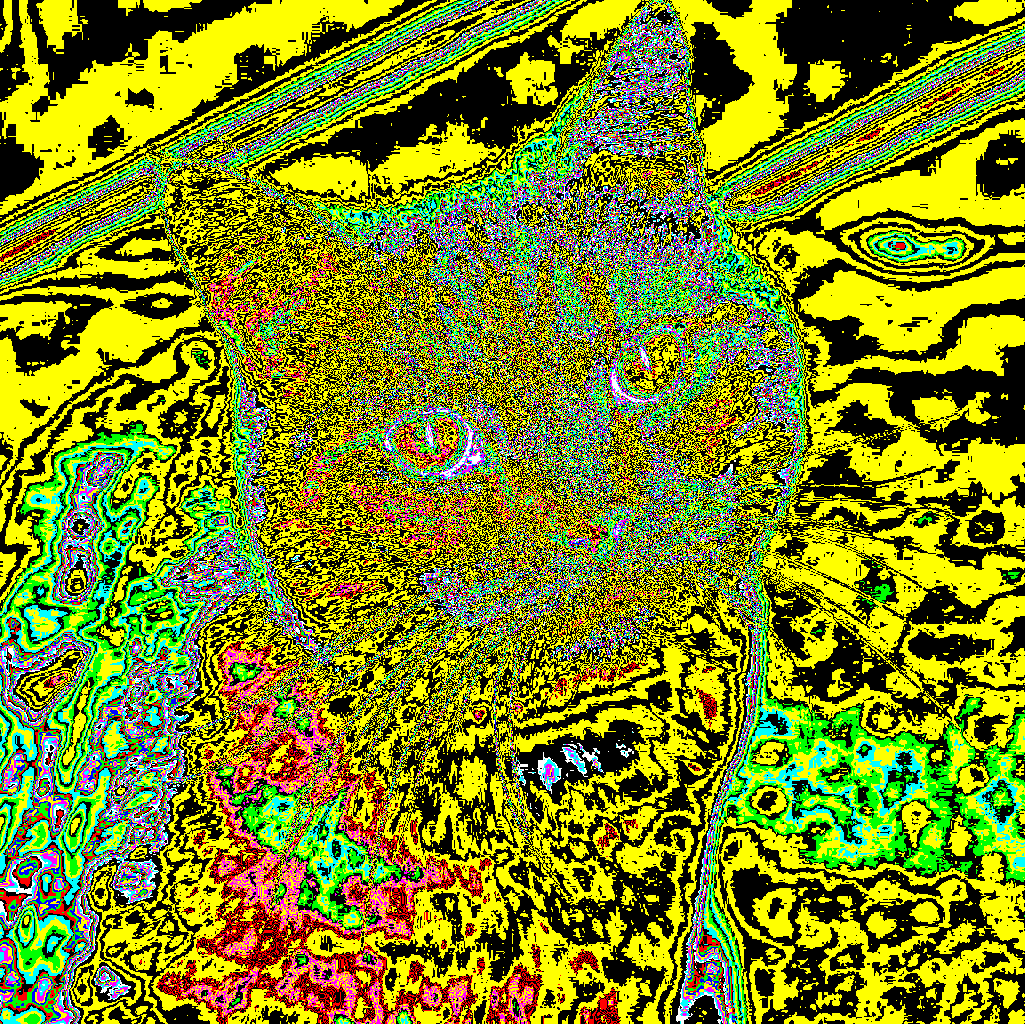